In [0]:
!wget https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_train.csv
!wget https://raw.githubusercontent.com/AJV009/Machine_Learning_NB/master/datasets/industry_energy/energy_test.csv

In [44]:
import pandas as pd
df = pd.read_csv('energy_train.csv')
test_df = pd.read_csv('energy_test.csv')

df = df.fillna(df.mean())
test_df = test_df.fillna(test_df.mean())

tdf = df[['date','WattHour','luminousity']]
tedf = test_df[['date','luminousity']]

tdf['date'] = pd.to_datetime(tdf['date'])
tedf['date'] = pd.to_datetime(tedf['date'])

tdf.columns = ['ds','y','lumino']
tedf.columns = ['ds','lumino']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


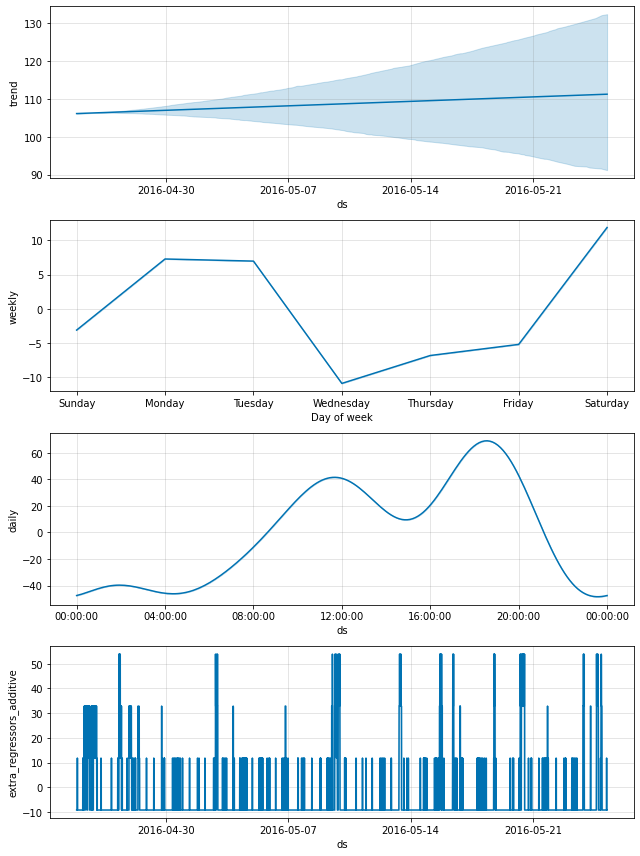

In [45]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

train_prophet = tdf.copy()
test_prophet = tedf.copy()

prophet = Prophet()
prophet.add_regressor('lumino')
prophet.fit(train_prophet)
forecast = prophet.predict(test_prophet)
_ = prophet.plot_components(forecast)

In [0]:
# forecast[['ds','yhat']]
y_pred = forecast['yhat']
y_pred = y_pred.round(0).astype('int64')
output = pd.DataFrame({'id': test_df.id,
                       'WattHour': y_pred})
output.to_csv('submission.csv', index=False)
from google.colab import files
files.download('submission.csv')